<a href="https://colab.research.google.com/github/Johang74/bicicletas/blob/main/Graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Reto 7
# Johan David Gomez Gil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

ruta = "/content/drive/MyDrive/Mision Tic/Ciclo 1/Reto 7/Datos_Clientes.csv"

datos = pd.read_csv(ruta)
datos = datos.drop(columns=['Unnamed: 0'])
datos

,cliente_nombres,cliente_apellido1,cliente_genero,bicleta_o_accesorio,bicleta_marca,accesorio
0,WENDY JOHANNA,RIVERA,F,accesorio,NaN,velocimetro
1,LUZ ELENA,MONTOYA,F,bicleta,Specialized,NaN
2,MILTON ANDERSON,GONZALEZ,M,accesorio,NaN,luces
3,ESPERANZA,VANEGAS,M,accesorio,NaN,velocimetro
4,LINA MARIA,RODRIGUEZ,F,bicleta,Specialized,NaN
...,...,...,...,...,...,...
95,CARLOS ARTURO,GARCIA,M,bicleta,treck,NaN
96,ESPERANZA,VANEGAS,M,accesorio,NaN,luces
97,ELISA,ESCALANTE,F,bicleta,Specialized,NaN
98,CARLOS ARTURO,GARCIA,M,bicleta,Specialized,NaN


In [8]:
datos["nombre"] = datos["cliente_nombres"] + " " + datos["cliente_apellido1"]
datos

,cliente_nombres,cliente_apellido1,cliente_genero,bicleta_o_accesorio,bicleta_marca,accesorio,nombre
0,WENDY JOHANNA,RIVERA,F,accesorio,NaN,velocimetro,WENDY JOHANNA RIVERA
1,LUZ ELENA,MONTOYA,F,bicleta,Specialized,NaN,LUZ ELENA MONTOYA
2,MILTON ANDERSON,GONZALEZ,M,accesorio,NaN,luces,MILTON ANDERSON GONZALEZ
3,ESPERANZA,VANEGAS,M,accesorio,NaN,velocimetro,ESPERANZA VANEGAS
4,LINA MARIA,RODRIGUEZ,F,bicleta,Specialized,NaN,LINA MARIA RODRIGUEZ
...,...,...,...,...,...,...,...
95,CARLOS ARTURO,GARCIA,M,bicleta,treck,NaN,CARLOS ARTURO GARCIA
96,ESPERANZA,VANEGAS,M,accesorio,NaN,luces,ESPERANZA VANEGAS
97,ELISA,ESCALANTE,F,bicleta,Specialized,NaN,ELISA ESCALANTE
98,CARLOS ARTURO,GARCIA,M,bicleta,Specialized,NaN,CARLOS ARTURO GARCIA


# Mejores clientes



*   Se saca una lista con cada uno de los clientes sin repetirlos
*   Se cuenta cuantas veces aparece el cliente en la base de datos, osea cuantas compras ha hecho
*Luego se imprime el nombre y las compras que ha hecho



In [12]:
clientes_unicos = list(datos["nombre"].unique())

clientes_plot = []
num_compras_plot = []

for i in clientes_unicos:
  num_compras = np.sum(datos["nombre"] == i)
  if num_compras > 1:
    clientes_plot.append(i)
    num_compras_plot.append(num_compras)
    print (i,":",num_compras)

WENDY JOHANNA RIVERA : 7
MILTON ANDERSON GONZALEZ : 6
ESPERANZA  VANEGAS : 3
LINA MARIA RODRIGUEZ : 8
CARLOS ARTURO GARCIA : 5
JOSE DARIO BERMUDEZ : 4
ARIEL  BEDOYA : 6
ELISA  ESCALANTE : 7
MARIA ALEYDA MARIN : 3


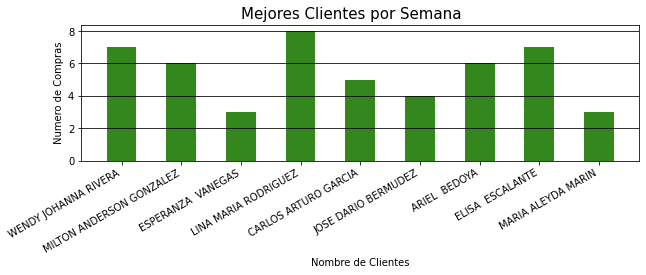

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 2.5)) #Crear el marco de la grafica
ax1.bar(clientes_plot,num_compras_plot, color = "#34871D", width = 0.5) #Dar formato de barras
ax1.set_xticklabels(clientes_plot, rotation=30, ha='right') # Dar formato al eje X
ax1.set_xlabel('Nombre de Clientes') # Dar nombre al eje X
ax1.set_ylabel('Numero de Compras') # Dar nombre al eje Y
fig.suptitle('Mejores Clientes por Semana', fontsize = 15) # Poner el titulo superior
plt.grid(True, axis="y", color = "black") # Mostrar grid solo en el eje y
plt.show() # Mostrar la grafica

# Quienes compran mas productos

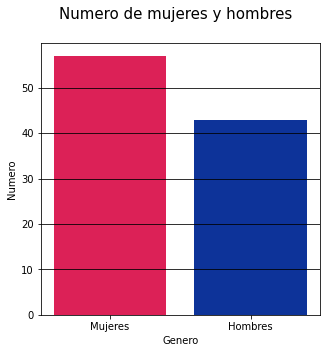

In [41]:
lista_generos = []
plot_generos = ["Mujeres","Hombres"] # Los nombres de cada barra
lista_generos.append(np.sum(datos["cliente_genero"] == "F")) # Suma la cantidad de mujeres que hay
lista_generos.append(np.sum(datos["cliente_genero"]=="M")) # Suma la cantidad de hombres que hay

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.bar(plot_generos,lista_generos, color = ["#DC2157","#0D3399"]) # Define formato barras y colores diferentes para cada una

ax1.set_xlabel("Genero")
ax1.set_ylabel("Numero")
fig.suptitle("Numero de mujeres y hombres", fontsize = 15)
plt.grid(True, axis="y", color = "black")
plt.show()

#¿Alguien ha comprado más de una bicicleta en esta semana, o más de un accesorio?

In [55]:
clientes_bicicleta  = datos.loc[datos['bicleta_o_accesorio'] == 'bicleta','cliente_nombres'] # Extrae a quienes han comprado bicicletas
clientes_accesorios = datos.loc[datos['bicleta_o_accesorio'] == 'accesorio','cliente_nombres'] # Extrae a quienes han comprado accesorios


In [53]:
print('Personas que han comprado mas de una bicicleta ... \n')
clientes_bicicleta_unicos = np.unique(clientes_bicicleta)
for ii in clientes_bicicleta_unicos:
    num_comp = sum(clientes_bicicleta == ii)
    if num_comp > 1:
      print(ii ,' : ',num_comp)

Personas que han comprado mas de una bicicleta ... 

CARLOS ARTURO  :  3
ELISA   :  5
JOSE DARIO  :  2
LINA MARIA  :  6
MARIA ALEYDA  :  2
MILTON ANDERSON  :  4
WENDY JOHANNA  :  3


In [54]:
print('Personas que han comprado mas de un accesorio ... \n')
clientes_accesorio_unicos = np.unique(clientes_accesorios)
for ii in clientes_accesorio_unicos:
    num_comp = sum(clientes_accesorios == ii)
    if num_comp > 1:
      print(ii ,' : ',num_comp)

Personas que han comprado mas de un accesorio ... 

ARIEL   :  5
CARLOS ARTURO  :  2
ELISA   :  2
ESPERANZA   :  3
JOSE DARIO  :  2
LINA MARIA  :  2
MILTON ANDERSON  :  2
WENDY JOHANNA  :  4


# Bicicletas mas compradas

In [88]:
bicicletas_unicas = list(datos["bicleta_marca"].unique()) # Lista de las marcas de bicicletas
bicicletas_unicas.pop(0)
bicicletas_plot = []
cantidad_plot = []

for i in bicicletas_unicas:
  cant = np.sum(datos["bicleta_marca"] == i)
  bicicletas_plot.append(i)
  cantidad_plot.append(cant)
  print(i,"",cant)

#bicicletas_plot.pop(0)
#cantidad_plot.pop(0)



Specialized  18
treck  18
BMC  18


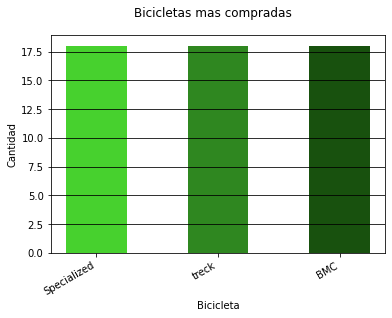

In [89]:
fig, ax1 = plt.subplots()
ax1.bar(bicicletas_plot,cantidad_plot, color = ["#47D12E","#2F8720","#18510E"], width=0.5)
ax1.set_xticklabels(bicicletas_plot, rotation=30, ha='right')
ax1.set_xlabel("Bicicleta")
ax1.set_ylabel("Cantidad")
fig.suptitle("Bicicletas mas compradas")
plt.grid(True, axis="y", color = "black")
plt.show()

# ¿Cuáles son los accesorios más comprados?

In [90]:
accesorios_unicos = list(datos["accesorio"].unique()) # Lista de accesorios
accesorios_unicos.pop(1)
accesorios_plot = []
cantidad_plot = []

for i in accesorios_unicos:
  cant = np.sum(datos["accesorio"] == i)
  accesorios_plot.append(i)
  cantidad_plot.append(cant)
  print(i,"",cant)

velocimetro  5
luces  8
herramientas  11
porta_bicicletas  11
casco  11


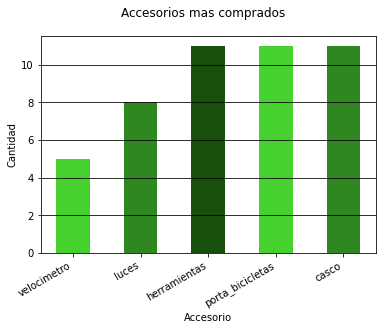

In [91]:
fig, ax1 = plt.subplots()
ax1.bar(accesorios_plot,cantidad_plot, color = ["#47D12E","#2F8720","#18510E"], width=0.5)
ax1.set_xticklabels(accesorios_plot, rotation=30, ha='right')
ax1.set_xlabel("Accesorio")
ax1.set_ylabel("Cantidad")
fig.suptitle("Accesorios mas comprados")
plt.grid(True, axis="y", color = "black")
plt.show()